## Preamble:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join("images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ec2-user/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ec2-user/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [ ]:
! git add .
! git commit -am "Added categories"
! git push origin master

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [46]:
housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

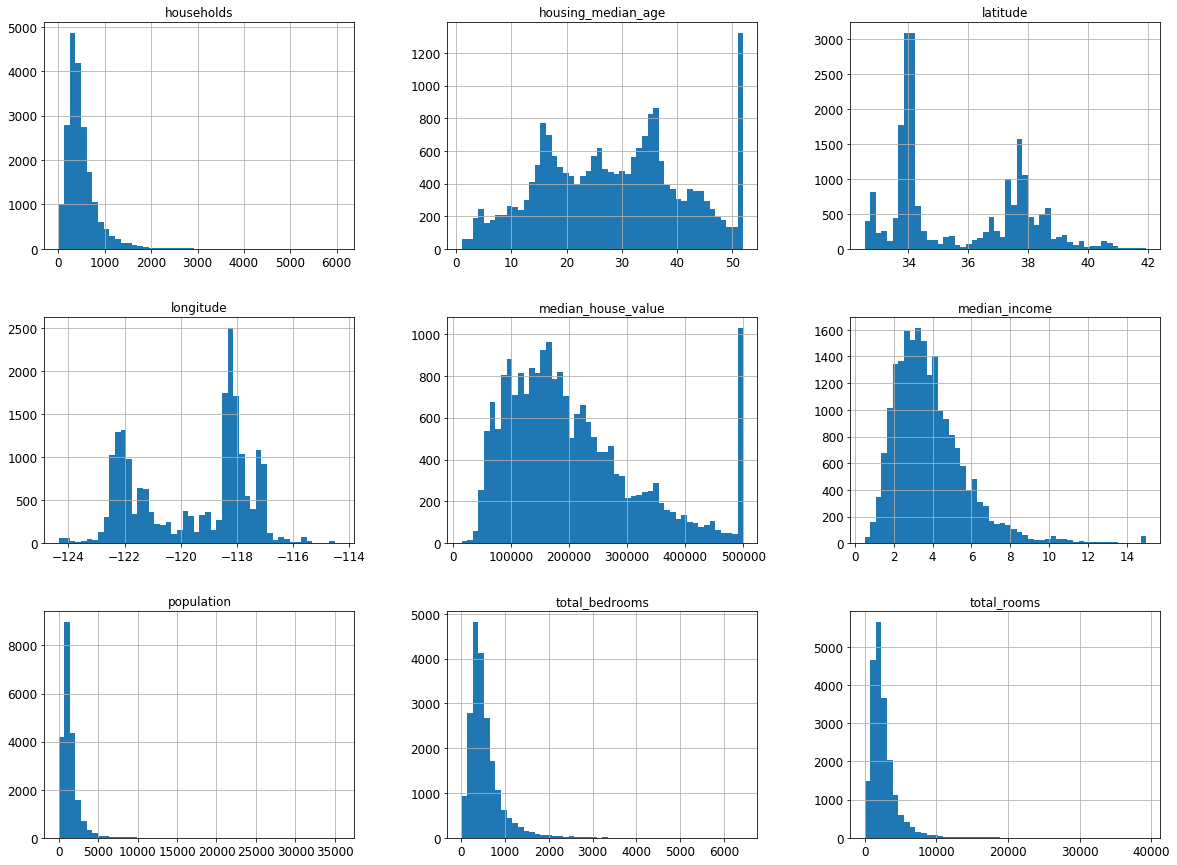

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
np.random.seed(42)

In [48]:
# Divide by 1.5 to limit the number of income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

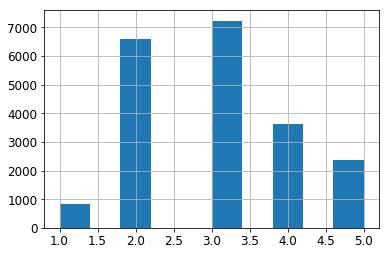

In [8]:
housing["income_cat"].hist()
plt.show()

In [49]:
from sklearn.model_selection import StratifiedShuffleSplit

housing_with_id = housing.reset_index()
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
housing = housing_with_id

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [10]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [11]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [12]:
housing = strat_train_set.copy()

## Discover and visualize the data to gain insights

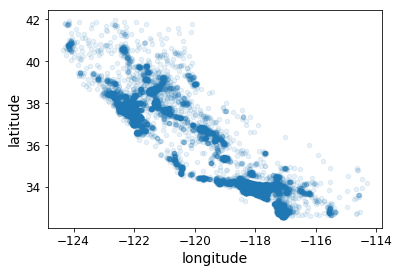

In [13]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

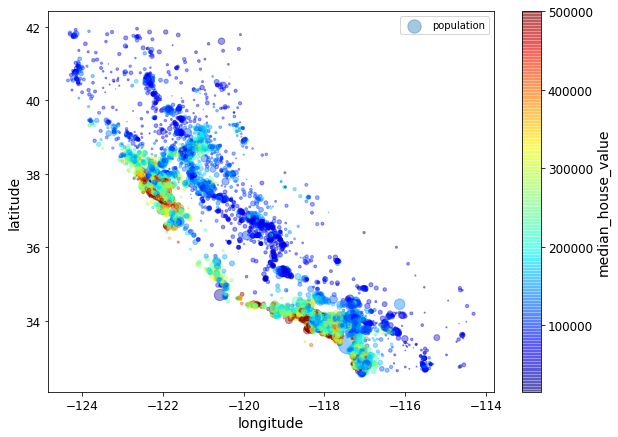

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()

## Correlations

In [16]:
corr_matrix = housing.corr()

In [19]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

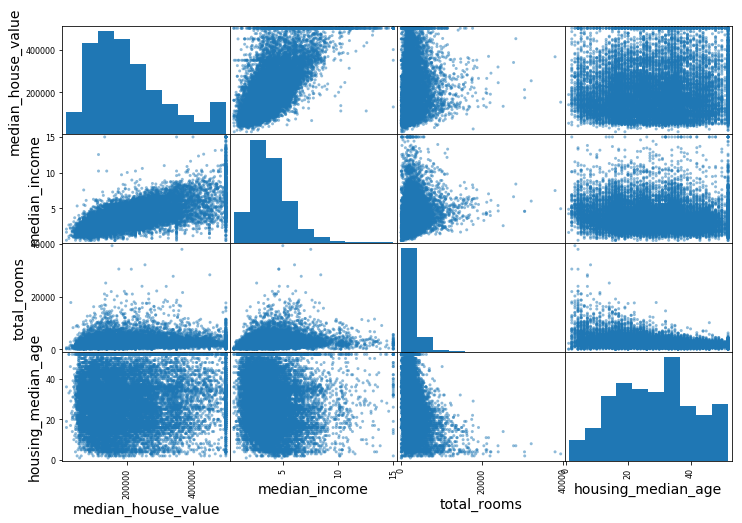

In [21]:
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
from pandas.plotting import scatter_matrix
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

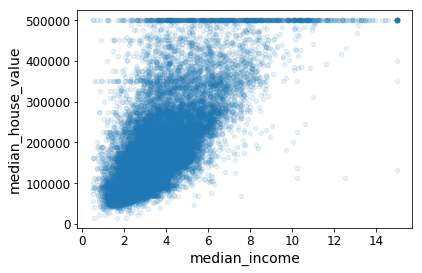

In [22]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show()

In [51]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [52]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
index                       0.072086
level_0                     0.072086
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
id                         -0.046166
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

## Prepare data for ML

In [56]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing = housing.drop("level_0", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [57]:
housing.head()

index  longitude  latitude  housing_median_age  total_rooms  \
17606  17606    -121.89     37.29                38.0       1568.0   
18632  18632    -121.93     37.05                14.0        679.0   
14650  14650    -117.20     32.77                31.0       1952.0   
3230    3230    -119.61     36.31                25.0       1847.0   
3555    3555    -118.59     34.23                17.0       6592.0   

       total_bedrooms  population  households  median_income ocean_proximity  \
17606           351.0       710.0       339.0         2.7042       <1H OCEAN   
18632           108.0       306.0       113.0         6.4214       <1H OCEAN   
14650           471.0       936.0       462.0         2.8621      NEAR OCEAN   
3230            371.0      1460.0       353.0         1.8839          INLAND   
3555           1525.0      4459.0      1463.0         3.0347       <1H OCEAN   

              id  income_cat  
17606 -121852.71         2.0  
18632 -121892.95         5.0  
14650 -117167.23         2.0  
3230  -119573.69         2.0  
3555  -118555.77         3.0

In [58]:
housing.drop("total_bedrooms", axis=1)

index  longitude  latitude  housing_median_age  total_rooms  \
17606  17606    -121.89     37.29                38.0       1568.0   
18632  18632    -121.93     37.05                14.0        679.0   
14650  14650    -117.20     32.77                31.0       1952.0   
3230    3230    -119.61     36.31                25.0       1847.0   
3555    3555    -118.59     34.23                17.0       6592.0   
19480  19480    -120.97     37.66                24.0       2930.0   
8879    8879    -118.50     34.04                52.0       2233.0   
13685  13685    -117.24     34.15                26.0       2041.0   
4937    4937    -118.26     33.99                47.0       1865.0   
4861    4861    -118.28     34.02                29.0        515.0   
16365  16365    -121.31     38.02                24.0       4157.0   
19684  19684    -121.62     39.14                41.0       2183.0   
19234  19234    -122.69     38.51                18.0       3364.0   
13956  13956    -117.06     34.17                21.0       2520.0   
2390    2390    -119.46     36.91                12.0       2980.0   
11176  11176    -117.96     33.83                30.0       2838.0   
15614  15614    -122.41     37.81                25.0       1178.0   
2953    2953    -119.02     35.35                42.0       1239.0   
13209  13209    -117.72     34.05                 8.0       1841.0   
6569    6569    -118.15     34.20                46.0       1505.0   
5825    5825    -118.30     34.19                14.0       3615.0   
18086  18086    -122.05     37.31                25.0       4111.0   
16718  16718    -120.66     35.49                17.0       4422.0   
13600  13600    -117.25     34.16                37.0       1709.0   
13989  13989    -117.19     34.94                31.0       2034.0   
15168  15168    -117.06     33.02                24.0        830.0   
6747    6747    -118.07     34.11                41.0       2869.0   
7398    7398    -118.24     33.96                44.0       1338.0   
5562    5562    -118.28     33.91                41.0        620.0   
16121  16121    -122.46     37.79                52.0       2059.0   
...      ...        ...       ...                 ...          ...   
12380  12380    -116.47     33.77                26.0       4300.0   
5618    5618    -118.23     33.78                20.0         59.0   
10060  10060    -121.06     39.25                17.0       3127.0   
18067  18067    -122.03     37.29                22.0       3118.0   
4471    4471    -118.17     34.09                33.0       2907.0   
19786  19786    -122.86     40.56                12.0       1350.0   
9969    9969    -122.48     38.51                49.0       1977.0   
14621  14621    -117.17     32.78                17.0       3845.0   
579      579    -122.07     37.71                40.0       1808.0   
11682  11682    -118.01     33.87                25.0       6348.0   
245      245    -122.21     37.78                43.0       1702.0   
12130  12130    -117.23     33.94                 8.0       2405.0   
16441  16441    -121.29     38.14                34.0       2770.0   
11016  11016    -117.82     33.76                33.0       2774.0   
19934  19934    -119.34     36.31                14.0       1635.0   
1364    1364    -122.14     38.03                42.0        118.0   
1236    1236    -120.37     38.23                13.0       4401.0   
5364    5364    -118.42     34.04                52.0       1358.0   
11703  11703    -117.97     33.88                16.0       2003.0   
10356  10356    -117.67     33.60                25.0       3164.0   
15270  15270    -117.29     33.08                18.0       3225.0   
3754    3754    -118.37     34.18                36.0       1608.0   
12166  12166    -117.14     33.81                13.0       4496.0   
6003    6003    -117.77     34.08                27.0       5929.0   
7364    7364    -118.20     33.97                43.0        825.0   
6563    6563    -

In [59]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

In [66]:
housing_num =  housing.drop("ocean_proximity", axis=1)
housing_num

index  longitude  latitude  housing_median_age  total_rooms  \
17606  17606    -121.89     37.29                38.0       1568.0   
18632  18632    -121.93     37.05                14.0        679.0   
14650  14650    -117.20     32.77                31.0       1952.0   
3230    3230    -119.61     36.31                25.0       1847.0   
3555    3555    -118.59     34.23                17.0       6592.0   
19480  19480    -120.97     37.66                24.0       2930.0   
8879    8879    -118.50     34.04                52.0       2233.0   
13685  13685    -117.24     34.15                26.0       2041.0   
4937    4937    -118.26     33.99                47.0       1865.0   
4861    4861    -118.28     34.02                29.0        515.0   
16365  16365    -121.31     38.02                24.0       4157.0   
19684  19684    -121.62     39.14                41.0       2183.0   
19234  19234    -122.69     38.51                18.0       3364.0   
13956  13956    -117.06     34.17                21.0       2520.0   
2390    2390    -119.46     36.91                12.0       2980.0   
11176  11176    -117.96     33.83                30.0       2838.0   
15614  15614    -122.41     37.81                25.0       1178.0   
2953    2953    -119.02     35.35                42.0       1239.0   
13209  13209    -117.72     34.05                 8.0       1841.0   
6569    6569    -118.15     34.20                46.0       1505.0   
5825    5825    -118.30     34.19                14.0       3615.0   
18086  18086    -122.05     37.31                25.0       4111.0   
16718  16718    -120.66     35.49                17.0       4422.0   
13600  13600    -117.25     34.16                37.0       1709.0   
13989  13989    -117.19     34.94                31.0       2034.0   
15168  15168    -117.06     33.02                24.0        830.0   
6747    6747    -118.07     34.11                41.0       2869.0   
7398    7398    -118.24     33.96                44.0       1338.0   
5562    5562    -118.28     33.91                41.0        620.0   
16121  16121    -122.46     37.79                52.0       2059.0   
...      ...        ...       ...                 ...          ...   
12380  12380    -116.47     33.77                26.0       4300.0   
5618    5618    -118.23     33.78                20.0         59.0   
10060  10060    -121.06     39.25                17.0       3127.0   
18067  18067    -122.03     37.29                22.0       3118.0   
4471    4471    -118.17     34.09                33.0       2907.0   
19786  19786    -122.86     40.56                12.0       1350.0   
9969    9969    -122.48     38.51                49.0       1977.0   
14621  14621    -117.17     32.78                17.0       3845.0   
579      579    -122.07     37.71                40.0       1808.0   
11682  11682    -118.01     33.87                25.0       6348.0   
245      245    -122.21     37.78                43.0       1702.0   
12130  12130    -117.23     33.94                 8.0       2405.0   
16441  16441    -121.29     38.14                34.0       2770.0   
11016  11016    -117.82     33.76                33.0       2774.0   
19934  19934    -119.34     36.31                14.0       1635.0   
1364    1364    -122.14     38.03                42.0        118.0   
1236    1236    -120.37     38.23                13.0       4401.0   
5364    5364    -118.42     34.04                52.0       1358.0   
11703  11703    -117.97     33.88                16.0       2003.0   
10356  10356    -117.67     33.60                25.0       3164.0   
15270  15270    -117.29     33.08                18.0       3225.0   
3754    3754    -118.37     34.18                36.0       1608.0   
12166  12166    -117.14     33.81                13.0       4496.0   
6003    6003    -117.77     34.08                27.0       5929.0   
7364    7364    -118.20     33.97                43.0        825.0   
6563    6563    -

In [67]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [64]:
imputer.statistics_

array([ 1.03410000e+04, -1.18510000e+02,  3.42600000e+01,  2.90000000e+01,
        2.11950000e+03,  4.33000000e+02,  1.16400000e+03,  4.08000000e+02,
        3.54090000e+00, -1.18475925e+05,  3.00000000e+00])

In [65]:
housing_num.median().values

array([ 1.03410000e+04, -1.18510000e+02,  3.42600000e+01,  2.90000000e+01,
        2.11950000e+03,  4.33000000e+02,  1.16400000e+03,  4.08000000e+02,
        3.54090000e+00, -1.18475925e+05,  3.00000000e+00])

In [68]:
x = imputer.transform(housing_num)

In [70]:
housing_tr = pd.DataFrame(x, columns=housing_num.columns)

Convert text categories (ocean proximity) into number based categories:

In [79]:
housing_cat = housing["ocean_proximity"]
housing_cat_encoded, housing_categories = housing_cat.factorize()

In [84]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [89]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [90]:
cat_encoder = CategoricalEncoder()
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)